# Data Exploration

In [ ]:
# 1.8 GB, 26 items/lectures
# samplerate: 44.100
# almost 32 hours of data

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
# import torchaudio
import datetime
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
base_directory = Path.cwd().parent

dataset_name = "yale_econ251"
data_dir = base_directory / 'data'

dataset_size = "normal" # or 'tiny'

if dataset_size == "tiny":
    audio_dir = data_dir / 'inputs' / dataset_name / 'lectures-tiny'
    transcripts_dir = data_dir / 'inputs' / dataset_name / 'transcripts-tiny'
else:
    audio_dir = data_dir / 'inputs' / dataset_name / 'lectures'
    transcripts_dir = data_dir / 'inputs' / dataset_name / 'transcripts'

In [4]:
# durations = []
#
# for audio in sorted(audio_directory.glob('*.mp3')):
#
#     data, sr = torchaudio.load(audio)
#
#     # plot_waveform(data, sr)
#
#     duration_mins = len(data[0]) / sr / 60
#     durations.append(duration_mins)
#
#     print(audio)
#     # break

In [5]:
durations = [74.27178231292517, 72.27646258503403,74.51646258503402,71.4705850340136,74.2269387755102,
            70.933768707483, 78.56761904761905,76.19526530612244,75.11727891156463,69.62155102040816,
             72.33872108843538,72.5564081632653,72.36179591836735,64.15151020408163,76.15085714285715,
             79.232,72.21942857142857,72.08489795918368,79.28990476190476,72.49371428571429,
             73.6888163265306,76.10557823129253,76.07597278911565,74.1629387755102,76.50002721088435,
             70.18753741496599]

Total duration: 1 day, 7:56:47.869388
Average: 73.72299319727891


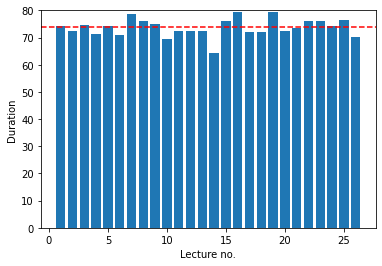

In [6]:
total_duration = datetime.timedelta(minutes=sum(durations))
print(f"Total duration: {total_duration}")

average = np.average(durations)
print(f"Average: {average}")

x = range(1, len(durations)+1, 1)
plt.bar(x, durations)

plt.xlabel('Lecture no.')
plt.ylabel('Duration')
plt.axhline(y=average, color='r', ls='--')
plt.ylim(ymin=0,ymax=80)
plt.show()

### Looking at the transcripts

In [7]:
# combined all text
all_text = ""
for transcript in transcripts_dir.glob('*.txt'):
    with open(transcript, 'r') as f:
        text = f.read()
        all_text += " " + text

In [8]:
all_words = set(all_text.split(" "))

In [9]:
wordcloud = WordCloud(width=800, height=400,collocations=False,
                      background_color ='white',
                      stopwords=STOPWORDS).generate(all_text)

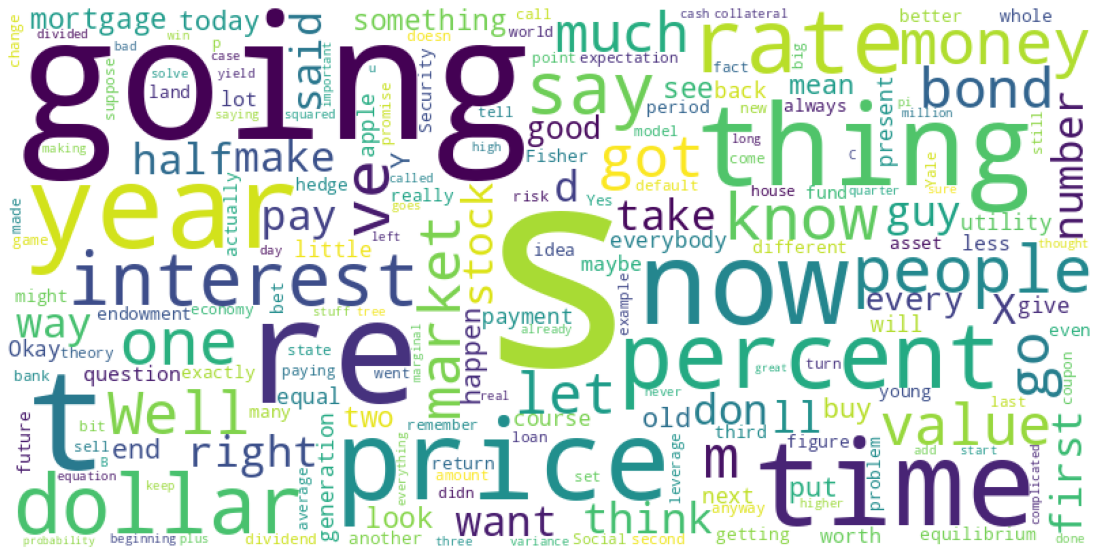

In [10]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()